In [1]:
!pip install seaborn
!pip install imblearn
!pip install sklearn
!pip install torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import os
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import Dataset, DataLoader

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
df = pd.read_csv('mitbih_train.csv', header = None)

In [3]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [4]:
df.rename(columns = {187: 'classes'}, inplace = True)

In [5]:
pd.unique(df['classes'])
df['classes'] = df['classes'].astype(int)

<Axes: >

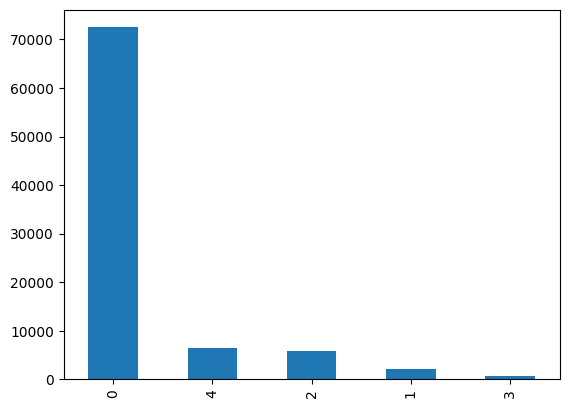

In [6]:
df['classes'].value_counts().plot(kind = 'bar')

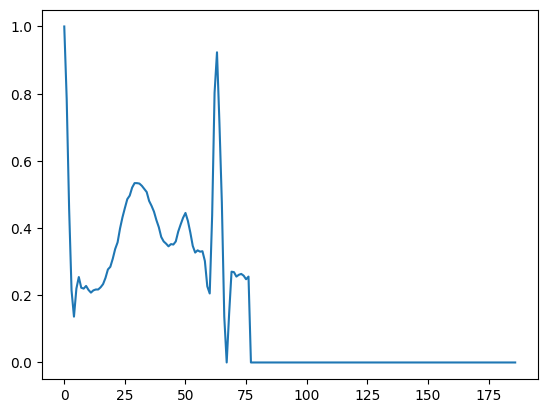

In [7]:
plt.plot(df.iloc[100, :-1])

<Axes: >

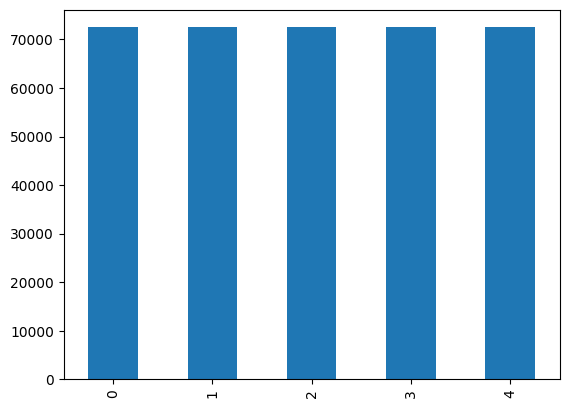

In [8]:
smote = SMOTE(random_state = 42)
X = df.drop('classes', axis = 1)
y = df['classes']
X_sm, y_sm = smote.fit_resample(X, y)
df_sm = pd.concat([X_sm, y_sm], axis = 1)
df_sm = df_sm.reset_index()
df_sm.drop(['index'], axis = 1, inplace=True)
df_sm['classes'].value_counts().plot(kind = 'bar')

In [9]:

df_sm

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,classes
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362350,0.734129,0.616127,0.485778,0.351101,0.190840,0.089054,0.032269,0.009664,0.031527,0.071370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
362351,0.801753,0.541161,0.500729,0.487252,0.461045,0.445255,0.391488,0.333737,0.260162,0.150138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
362352,0.973720,0.925187,0.873577,0.801348,0.707915,0.592022,0.471505,0.376119,0.301465,0.228963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
362353,0.735002,0.634742,0.531005,0.417347,0.320142,0.193078,0.117065,0.064134,0.045439,0.044225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [10]:
df_sm_corr = df_sm.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(df_sm_corr, annot=False, linewidths=0.5, fmt= ".2f")